In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
data_home ="data/proportional_move/"

beta = 0.25
q=0.3
beta_str=str(np.round(beta, 2)).replace('.', '')
q_str=str(np.round(q, 1)).replace('.', '')
filename = f"2_regular_edgesize_5_prop_change_beta_{beta_str}_q_{q_str}.csv"

In [94]:
filename

'2_regular_edgesize_5_prop_change_beta_025_q_03.csv'

In [102]:
df = pd.read_csv(data_home + filename)


In [5]:
df.head()

,sample id,datatype,0,1,2,3,4,5,6,7,...,91,92,93,94,95,96,97,98,99,100
0,0,sum_opinion_A,500,500,517,501,522,506,499,492,...,529,528,548,543,545,556,554,556,559,560.0
1,0,binned_opinions_home,9 31 52 70 35 3,18 27 50 46 43 16,29 29 42 36 40 24,32 26 36 33 40 33,36 27 31 40 33 33,41 24 35 31 33 36,45 27 30 27 31 40,44 30 26 30 25 45,...,65 21 9 10 16 79,66 15 9 11 13 86,68 13 10 12 11 86,65 15 10 15 10 85,61 14 15 13 12 85,61 18 10 14 11 86,60 20 9 10 17 84,64 14 10 10 15 87,65 15 5 8 24 83,NaN
2,0,binned_opinions_wp,4 0 43 0 55 0 51 0 41 6,20 11 25 6 18 29 29 8 29 25,28 11 31 7 7 21 29 16 25 25,25 10 27 11 13 20 20 14 25 35,32 10 27 10 9 23 22 12 19 36,40 8 24 10 10 21 18 15 20 34,45 5 20 10 8 25 13 10 23 41,43 7 21 15 10 18 12 11 15 48,...,61 1 14 8 1 9 10 4 7 85,57 4 9 10 2 10 12 2 7 87,62 5 7 10 1 8 14 1 7 85,62 3 8 10 0 7 13 8 5 84,56 6 10 10 1 8 11 4 7 87,53 4 13 13 2 10 10 5 3 87,54 6 9 10 0 15 8 8 7 83,57 6 11 7 0 8 15 6 8 82,59 6 8 8 1 10 12 4 7 85,NaN
3,0,binned_edge_sizes_wp,0 0 0 0 0 200 0 0 0 0 0 0 0 0,0 0 0 2 58 88 43 8 1 0 0 0 0 0,0 0 0 13 60 65 44 14 2 2 0 0 0 0,0 0 1 19 57 61 37 17 5 3 0 0 0 0,0 0 6 24 55 51 34 11 15 1 2 1 0 0,0 0 7 26 57 43 36 11 13 4 2 0 1 0,0 0 11 23 59 44 28 17 10 1 3 2 1 1,0 0 8 31 57 39 32 15 9 1 2 4 1 1,...,0 0 28 56 29 28 15 8 16 3 4 3 2 4,0 0 25 61 32 24 14 8 13 8 1 4 1 5,0 0 27 61 32 20 13 10 15 6 3 3 1 4,0 0 28 59 35 19 12 11 15 4 5 1 2 4,0 0 26 60 36 20 11 9 13 8 4 2 5 2,0 0 27 58 34 22 13 11 11 7 5 3 2 3,0 0 25 55 41 23 10 14 7 7 8 2 0 4,0 0 27 51 41 22 13 15 8 5 6 4 0 5,0 0 27 53 35 25 15 13 10 3 8 4 1 2,NaN
4,1,sum_opinion_A,500,500,531,545,545,569,564,544,...,603,600,604,623,634,626,641,634,631,624.0


In [103]:
results={}

row_names = ['sum_opinion_A','binned_opinions_home','binned_opinions_wp','binned_edge_sizes_wp']
iterations=300
for row_i,row in enumerate(row_names):
    results[row]=[]
    if row != 'sum_opinion_A':
        pdrow=list(df.iloc[[row_i]].values[0])
        for j in range(len(pdrow[2].split(' '))):
                results[row].append([])
                
    for i in range(iterations):
        pdrow=list(df.iloc[[i * len(row_names) + row_i]].values[0])        
        if row != 'sum_opinion_A':
            for j,k in enumerate(pdrow[2].split(' ')):
                    results[row][j].append([])
            for item in pdrow[2:-1]:
                for j,k in enumerate(item.split(' ')):
                    results[row][j][i].append(int(k))
        else:
            try:
                results[row].append([int(item)for item in pdrow[2:-1]])
            except:
                print(i)
                break

## Time evolution of 'A' opinions 

In [106]:
fs=20
ts=15

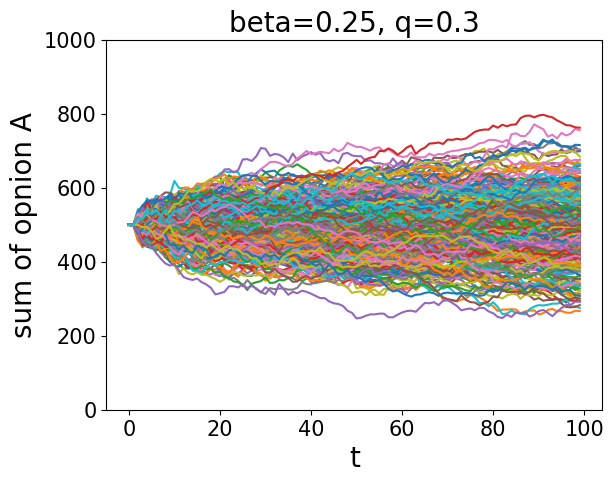

In [107]:
fig,ax=plt.subplots()
beta = 0.25
q=0.3
for i in range(iterations):
    ax.plot(results['sum_opinion_A'][i])
ax.set_ylabel('sum of opnion A',fontsize=fs)
ax.set_xlabel('t',fontsize=fs)
ax.set_title(f'{beta=}, {q=}',fontsize=fs)
ax.tick_params('both', labelsize=ts)
ax.set_ylim(0,1000)
plt.savefig('')
plt.show()

In [110]:
iterations

300

In [111]:
np.std(data, axis=0)

array([ 0.        ,  0.46536724, 15.16964037, 21.47399564, 25.66344136,
       27.86058546, 30.37001793, 32.40716982, 34.48842302, 37.32463158,
       39.95108384, 42.15733428, 43.55513428, 45.70560615, 46.72393855,
       47.27843894, 49.12099981, 50.58798924, 52.27882894, 53.58887229,
       54.55659691, 56.34728378, 57.23086774, 57.71930892, 58.71025994,
       59.36541183, 60.32069951, 61.03071895, 61.82256645, 62.51028395,
       63.08678537, 63.75527264, 63.81791903, 64.62380229, 64.7370507 ,
       65.1137189 , 65.24019305, 66.07237614, 67.3772018 , 68.2374967 ,
       68.60885722, 69.4588732 , 70.23879934, 70.61525205, 71.45417949,
       71.58815731, 72.21728779, 73.28967155, 74.72699014, 75.96023492,
       76.77631427, 76.49429456, 76.98246871, 77.31104988, 77.13837523,
       78.38500537, 77.89447021, 78.46109326, 79.08023851, 78.67242098,
       79.08029225, 79.47972236, 79.66235825, 79.17873761, 79.44549851,
       79.17555992, 80.2822296 , 80.92434629, 82.06854391, 82.07

In [113]:
import scipy.stats

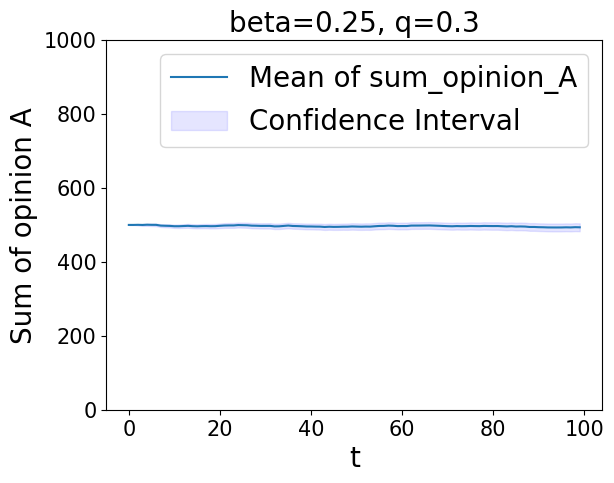

In [119]:
# Assuming `results['sum_opinion_A']` is a list of arrays where each array corresponds to an iteration
iterations = len(results['sum_opinion_A'])
t_steps = len(results['sum_opinion_A'][0])

# Convert to a NumPy array for easier calculations: shape (iterations, t_steps)
data = np.array(results['sum_opinion_A'])

# Calculate the mean and 95% confidence interval
mean_values = np.mean(data, axis=0)

conflev = 0.05
t_value = scipy.stats.t.ppf(1 - conflev / 2, iterations - 1)
ci = t_value * np.std(data, axis=0) / np.sqrt(iterations)
y_ci_lower=mean_values - ci
y_ci_upper=mean_values + ci


# Plotting
fig, ax = plt.subplots()
ax.plot(mean_values, label='Mean of sum_opinion_A')
ax.fill_between(range(t_steps), y_ci_lower, y_ci_upper, color='b', alpha=0.1, label='Confidence Interval')

# Labels and title
ax.set_ylabel('Sum of opinion A', fontsize=fs)
ax.set_xlabel('t', fontsize=fs)
ax.set_title(f'{beta=}, {q=}', fontsize=fs)
ax.tick_params('both', labelsize=ts)
ax.set_ylim(0,1000)

# Legend
ax.legend(fontsize=fs)

# Show plot
plt.show()


In [120]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

In [122]:
def inter_from_256(x):
    return np.interp(x=x,xp=[0,255],fp=[0,1])

#color pinterest
S_color=(inter_from_256(231),inter_from_256(197),inter_from_256(108))
I_color=(inter_from_256(189),inter_from_256(108),inter_from_256(78))
SI_color=(inter_from_256(86),inter_from_256(141),inter_from_256(162))
colors=[S_color,I_color,SI_color]

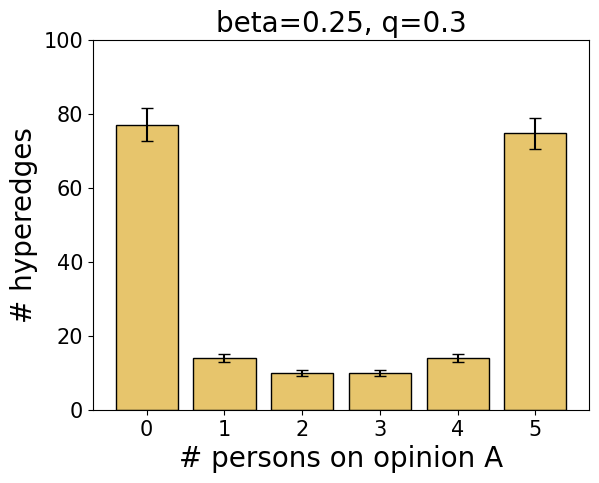

In [129]:
data_mean=[]
data_error=[]

fig, ax = plt.subplots()
ax.set_title(f'{beta=}, {q=}',fontsize=fs)
for i in range(len(results['binned_opinions_home'])):
    data=[results['binned_opinions_home'][i][it][-1] for it in range(iterations)]
    m =mean_confidence_interval(data,0.95)
    data_mean.append(m[0])
    data_error.append(2*m[1])
ax.bar(np.arange(len(results['binned_opinions_home'])), data_mean, 0.8, label=None, color=colors[0],edgecolor = 'black',yerr=data_error, capsize=4,)
# Customize the second subplot
ax.set_xticks(np.arange(len(results['binned_opinions_home'])))
ax.set_ylabel(r'# hyperedges', fontsize=fs)
ax.set_xlabel(r'# persons on opinion A', fontsize=fs)
ax.tick_params(axis='both', labelsize=ts)# Example categories
ax.set_ylim(0,100)
plt.show()


In [40]:
betas=np.arange(0.2,1.05,0.05)
qs=np.arange(0.3,1,0.1)

In [47]:
len(betas)

17

In [48]:
len(qs)

7

In [57]:
qs[::2]

array([0.3, 0.5, 0.7, 0.9])

In [51]:
for beta in betas[::4]:
    for q in qs[::4]:
        

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [50]:
betas

array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ,
       0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [81]:
betas=np.arange(0.2,1.05,0.05)
qs=np.arange(0.3,1,0.1)
row_names = ['sum_opinion_A','binned_opinions_home','binned_opinions_wp','binned_edge_sizes_wp']
iterations=300

all_res = []
for beta_i, beta in enumerate(betas):
    all_res.append([])
    for q_i,q in enumerate(qs):
        beta_str=str(np.round(beta, 2)).replace('.', '')
        q_str=str(np.round(q, 1)).replace('.', '')
        filename = f"2_regular_edgesize_5_prop_change_beta_{beta_str}_q_{q_str}.csv"
        df = pd.read_csv(data_home + filename)
        
        results={}
        for row_i,row in enumerate(row_names):
            results[row]=[]
            if row != 'sum_opinion_A':
                pdrow=list(df.iloc[[row_i]].values[0])
                for j in range(len(pdrow[2].split(' '))):
                        results[row].append([])
            for i in range(iterations):
                pdrow=list(df.iloc[[i * len(row_names) + row_i]].values[0])        
                if row != 'sum_opinion_A':
                    for j,k in enumerate(pdrow[2].split(' ')):
                        results[row][j].append([])
                    for item in pdrow[2:-1]:
                        for j,k in enumerate(item.split(' ')):
                            results[row][j][i].append(int(k))
                else:
                    try:
                        results[row].append([int(item)for item in pdrow[2:-1]])
                    except:
                        print(i)
                        break
        all_res[beta_i].append(results)

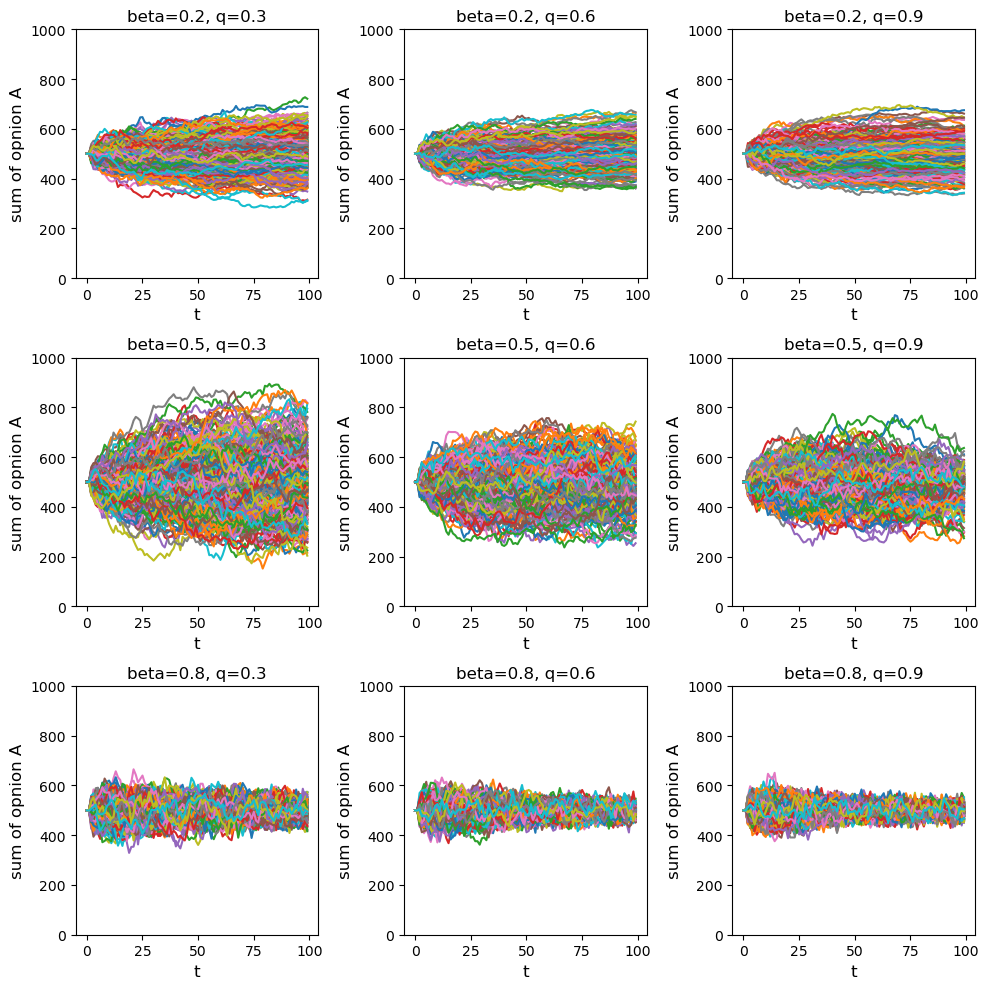

In [178]:
fs=12
ts=10

fig, axes = plt.subplots(len(betas[::6]),len(qs[::3]), figsize=(10,10))
axes=axes.flatten()
k=0
for i in range(0,len(betas),6):
    for j in range(0,len(qs),3):
        results=all_res[i][j]
        ax=axes[k]
        k+=1
        beta=betas[i]
        q=qs[j]
        
        for it in range(iterations):
            ax.plot(results['sum_opinion_A'][it])
        ax.set_ylabel('sum of opnion A',fontsize=fs)
        ax.set_xlabel('t',fontsize=fs)
        ax.set_title(f'{beta=:.1f}, {q=:.1f}',fontsize=fs)
        ax.tick_params('both', labelsize=ts)
        ax.set_ylim((0,1000))
plt.tight_layout()
plt.savefig('figures/sum_of_A.pdf')
plt.show()
        


In [76]:
len(all_res[i][j]['binned_opinions_home'][0])

30000

In [176]:
betas[::6]

array([0.2, 0.5, 0.8])

In [177]:
qs[::3]

array([0.3, 0.6, 0.9])

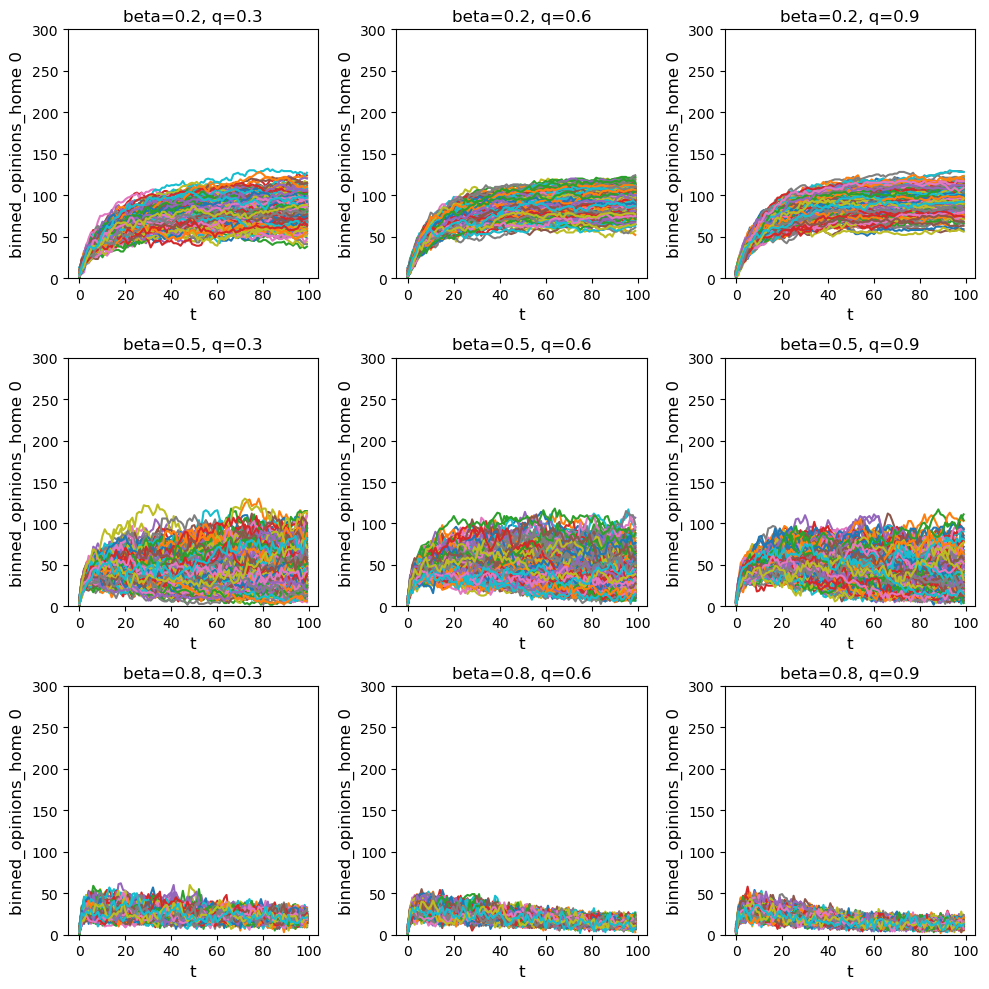

In [83]:
fs=12
ts=10

fig, axes = plt.subplots(len(betas[::6]),len(qs[::3]), figsize=(10,10))
axes=axes.flatten()
k=0
for i in range(0,len(betas),6):
    for j in range(0,len(qs),3):
        results=all_res[i][j]
        ax=axes[k]
        k+=1
        beta=betas[i]
        q=qs[j]
        
        for it in range(iterations):
            ax.plot(results['binned_opinions_home'][0][it])
        ax.set_ylabel('binned_opinions_home 0',fontsize=fs)
        ax.set_xlabel('t',fontsize=fs)
        ax.set_title(f'{beta=:.1f}, {q=:.1f}',fontsize=fs)
        ax.tick_params('both', labelsize=ts)
        ax.set_ylim((0,300))
plt.tight_layout()

plt.show()
        


In [151]:
for i in range(0,len(betas),6):
    print(betas[i])

0.2
0.49999999999999994
0.7999999999999998


In [186]:
fs=12
ts=10
def hyperedge_opinions(row='binned_opinions_home', color_i=0, typeofedges='home'):
    fig, axes = plt.subplots(len(betas[::6]),len(qs[::3]), figsize=(10,10))
    axes=axes.flatten()
    k=0
    for i in range(0,len(betas),6):
        beta=betas[i]
        for j in range(0,len(qs),3):
            results=all_res[i][j]
            ax=axes[k]
            
            q=qs[j]
            
            data_mean=[]
            data_error=[]
            print(beta,q)
            ax.set_title(f'{beta=:.1f}, {q=:.1f}',fontsize=fs)
            for l in range(len(results[row])):
                data=[results[row][l][it][-1] for it in range(iterations)]
                m =mean_confidence_interval(data,0.95)
                data_mean.append(m[0])
                data_error.append(2*m[1])
            ax.bar(np.arange(len(results[row])), data_mean, 0.8, label=None, color=colors[color_i],edgecolor = 'black',yerr=data_error, capsize=4,)
            # Customize the second subplot
            ax.set_ylim(0,100)
            if typeofedges=='home':
                ax.set_ylabel(f'# {typeofedges} hyperedges', fontsize=fs)
                ax.set_xlabel(r'# persons on opinion A', fontsize=fs)
                ax.set_xticks(np.arange(len(results[row])))
                
            elif typeofedges=='workplace':
                ax.set_ylabel(f'# {typeofedges} hyperedges', fontsize=fs)
                ax.set_xlabel(r'rate of persons on opinion A', fontsize=fs)
                ax.set_xticks(np.arange(0,len(results[row]),2), (np.arange(0,len(results[row]),2)+1)/10)
            else:
                ax.set_ylabel(f'# {typeofedges} hyperedges', fontsize=fs)
                ax.set_xlabel(r'size', fontsize=fs)
                ax.set_xticks(np.arange(len(results[row]))+1)
                ax.set_ylim((0,200))
                ax.set_xlim((1,15))
                
            ax.tick_params(axis='both', labelsize=ts)# Example categories
            
            k+=1
    plt.tight_layout()

0.2 0.3
0.2 0.6000000000000001
0.2 0.9000000000000001
0.49999999999999994 0.3
0.49999999999999994 0.6000000000000001
0.49999999999999994 0.9000000000000001
0.7999999999999998 0.3
0.7999999999999998 0.6000000000000001
0.7999999999999998 0.9000000000000001


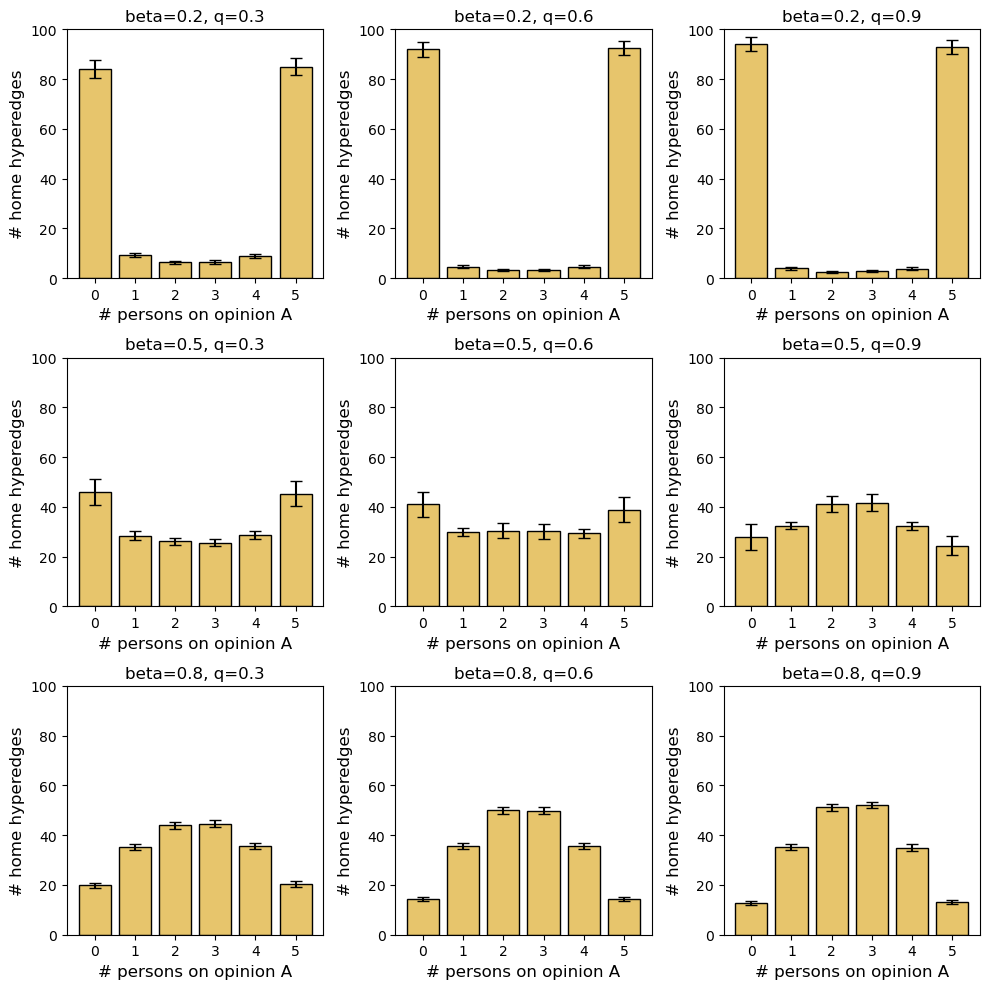

In [179]:
hyperedge_opinions(row='binned_opinions_home', color_i=0)
plt.savefig('figures/binned_opinions_home.pdf')

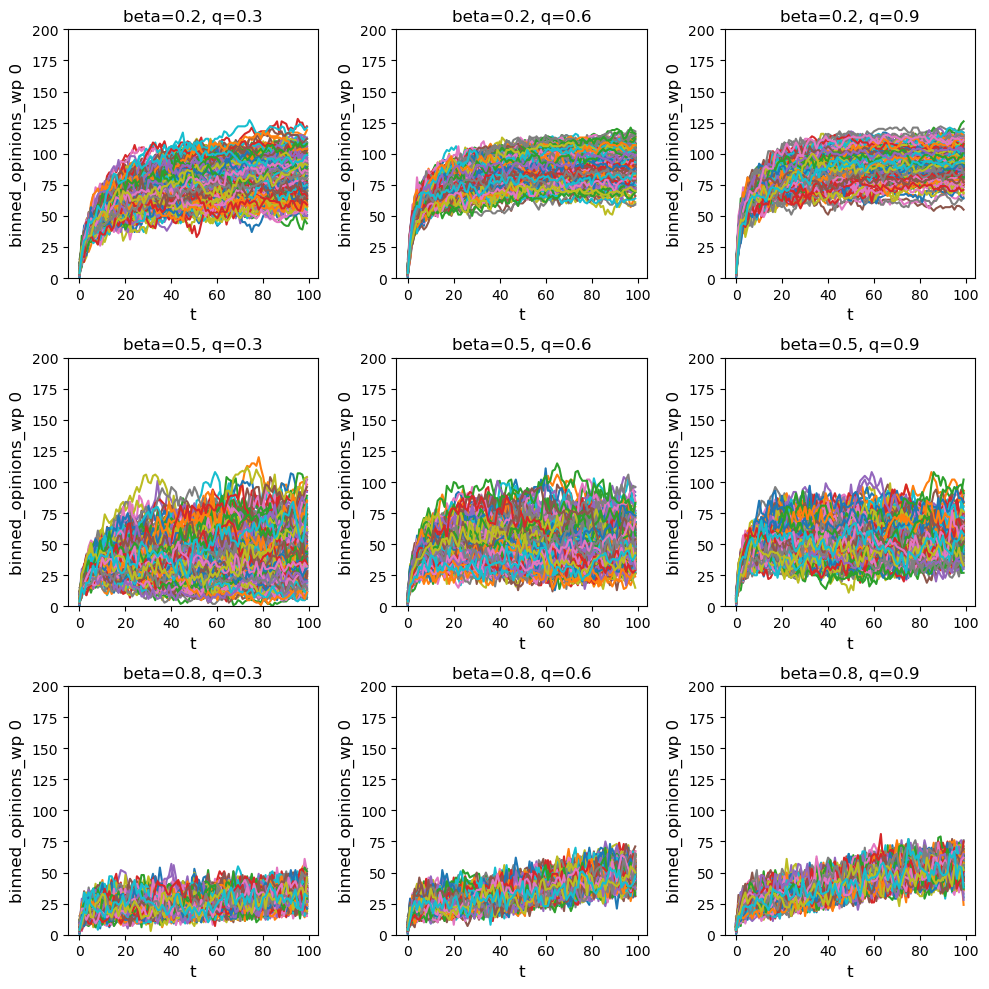

In [85]:
fs=12
ts=10

fig, axes = plt.subplots(len(betas[::6]),len(qs[::3]), figsize=(10,10))
axes=axes.flatten()
k=0
for i in range(0,len(betas),6):
    for j in range(0,len(qs),3):
        results=all_res[i][j]
        ax=axes[k]
        k+=1
        beta=betas[i]
        q=qs[j]
        
        for it in range(iterations):
            ax.plot(results['binned_opinions_wp'][0][it])
        ax.set_ylabel('binned_opinions_wp 0',fontsize=fs)
        ax.set_xlabel('t',fontsize=fs)
        ax.set_title(f'{beta=:.1f}, {q=:.1f}',fontsize=fs)
        ax.tick_params('both', labelsize=ts)
        ax.set_ylim((0,200))
plt.tight_layout()
plt.show()
        


0.2 0.3
0.2 0.6000000000000001
0.2 0.9000000000000001
0.49999999999999994 0.3
0.49999999999999994 0.6000000000000001
0.49999999999999994 0.9000000000000001
0.7999999999999998 0.3
0.7999999999999998 0.6000000000000001
0.7999999999999998 0.9000000000000001


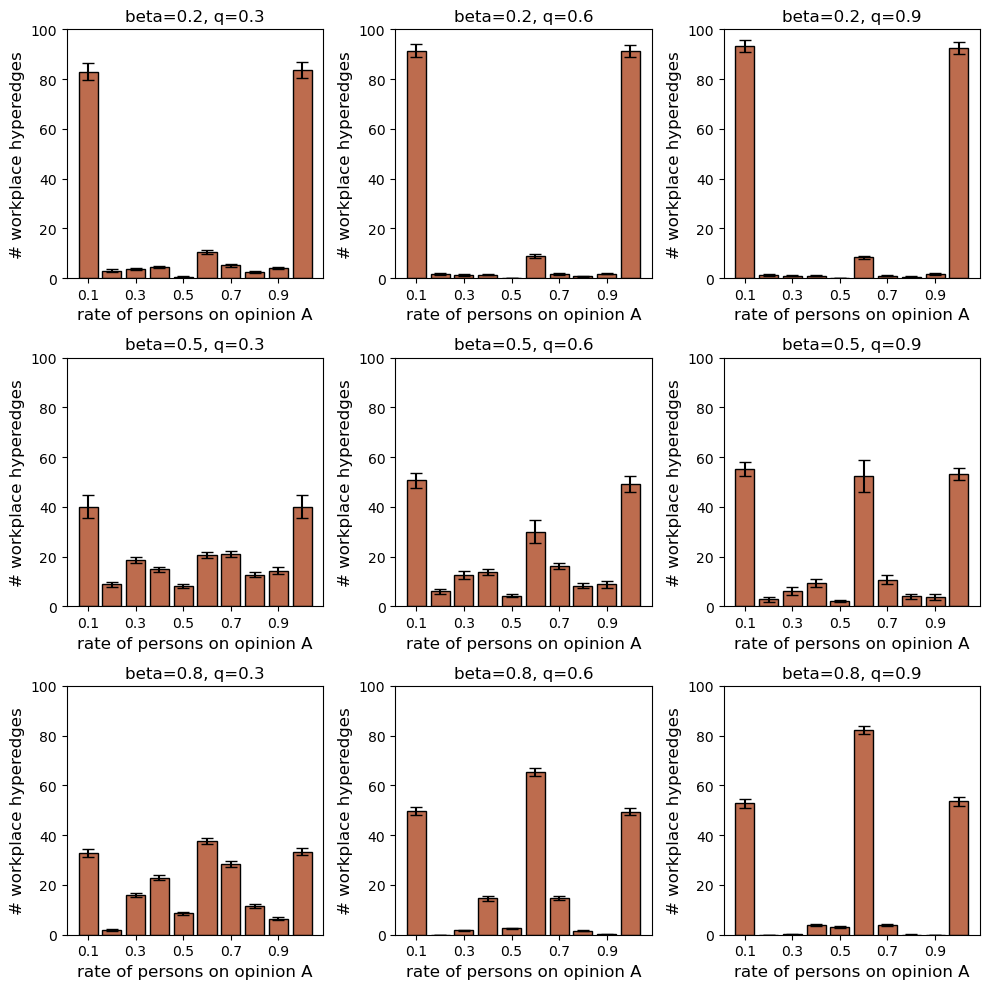

In [180]:
hyperedge_opinions(row='binned_opinions_wp', color_i=1, typeofedges='workplace')

plt.savefig('figures/binned_opinions_wp.pdf')

0.2 0.3
0.2 0.6000000000000001
0.2 0.9000000000000001
0.49999999999999994 0.3
0.49999999999999994 0.6000000000000001
0.49999999999999994 0.9000000000000001
0.7999999999999998 0.3
0.7999999999999998 0.6000000000000001
0.7999999999999998 0.9000000000000001


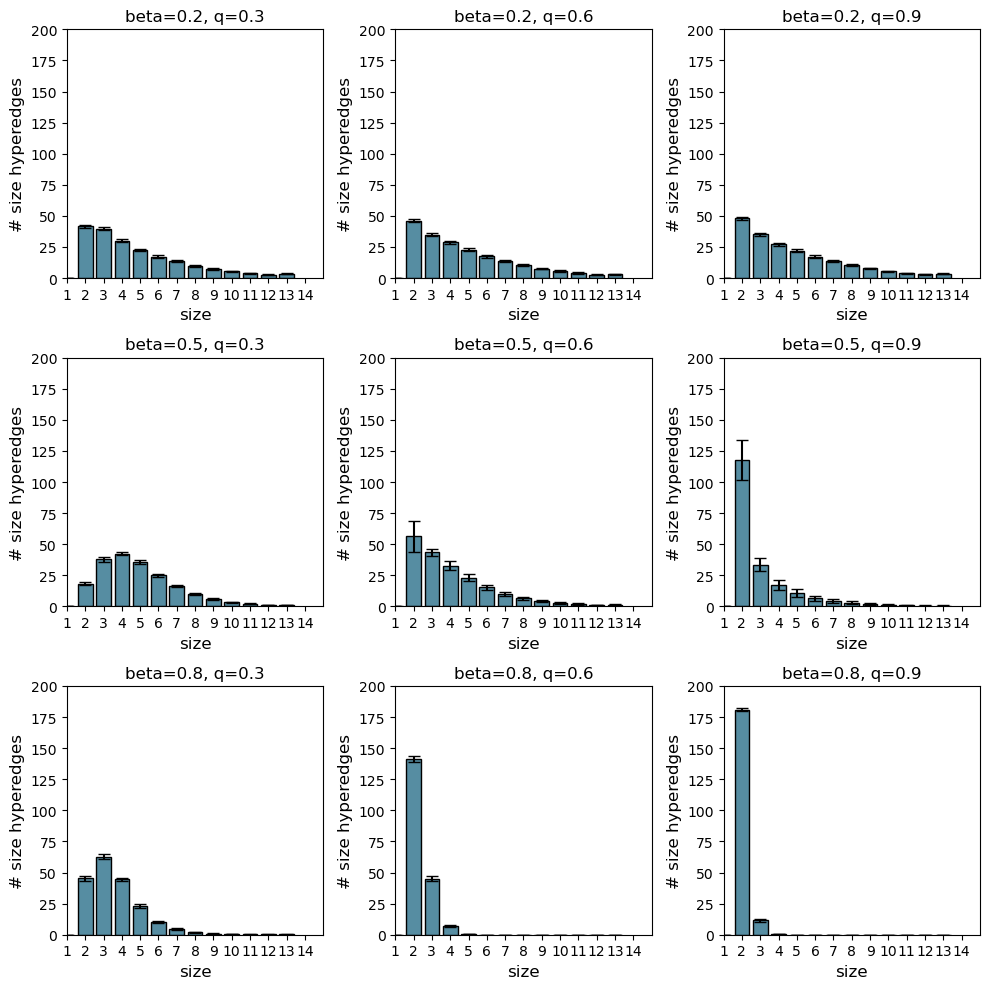

In [187]:
hyperedge_opinions(row='binned_edge_sizes_wp', color_i=2, typeofedges='size')
plt.savefig('figures/binned_edge_sizes_wp.pdf')

In [ ]:
data_home ="data/proportional_move2/"
betas=np.arange(0.2,1.05,0.05)
qs=np.arange(0.3,0.8,0.1)
row_names = ['sum_opinion_A','binned_opinions_home','binned_opinions_wp','binned_edge_sizes_wp', 'move_count', 'op_change_count']
iterations=10

all_res2 = []
for beta_i, beta in enumerate(betas):
    all_res2.append([])
    for q_i,q in enumerate(qs):
        beta_str=str(np.round(beta, 2)).replace('.', '')
        q_str=str(np.round(q, 1)).replace('.', '')
        filename = f"2_regular_edgesize_5_maj_change_beta_{beta_str}_q_{q_str}.csv"
        df = pd.read_csv(data_home + filename)
        
        results={}
        for row_i,row in enumerate(row_names):
            results[row]=[]
            if row != 'sum_opinion_A':
                pdrow=list(df.iloc[[row_i]].values[0])
                for j in range(len(pdrow[2].split(' '))):
                        results[row].append([])
            for i in range(iterations):
                pdrow=list(df.iloc[[i * len(row_names) + row_i]].values[0])        
                if row != 'sum_opinion_A':
                    for j,k in enumerate(pdrow[2].split(' ')):
                        results[row][j].append([])
                    for item in pdrow[2:-1]:
                        for j,k in enumerate(item.split(' ')):
                            results[row][j][i].append(int(k))
                else:
                    try:
                        results[row].append([int(item)for item in pdrow[2:-1]])
                    except:
                        print(i)
                        break
        all_res2[beta_i].append(results)